Columna: all_aboard
Número de outliers/anomalías: 508
Límite inferior: -36.375
Límite superior: 76.625
Valores de los outliers/anomalías:
      indice              fecha HORA declarada  \
364      364  February 12, 1935              ?   
462      462       May 06, 1937           1925   
1116    1116      June 07, 1949          00:25   
1165    1165     March 12, 1950           1450   
1360    1360  December 20, 1952        c 06:30   
...      ...                ...            ...   
4994    4994   January 08, 2020           0618   
4995    4995  February 05, 2020           1819   
4997    4997       May 22, 2020           1440   
4998    4998    August 07, 2020           1914   
5006    5006      July 04, 2021          11:30   

                                 Ruta                         OperadOR  \
364        Off Point Sur, Californiia               Military - US Navy   
462             Lakehurst, New Jersey       Deutsche Zeppelin Reederei   
1116            San Juan, Puerto Rico  

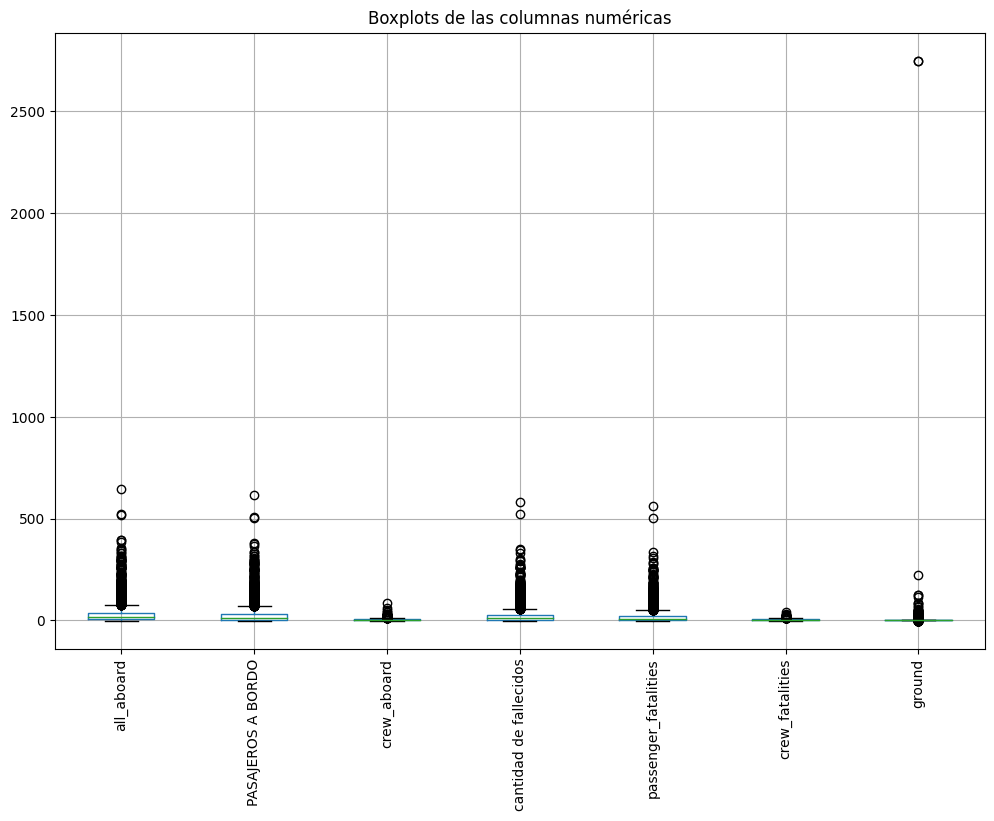

In [48]:


# Seleccionar las columnas numéricas de interés
numeric_cols = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard',
                'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']

# Calcular los cuartiles y los límites de los bigotes para cada columna
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Identificar los outliers y anomalías en la columna
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    # Imprimir los resultados
    print(f"Columna: {col}")
    print(f"Número de outliers/anomalías: {len(outliers)}")
    print(f"Límite inferior: {lower_limit}")
    print(f"Límite superior: {upper_limit}")
    print("Valores de los outliers/anomalías:")
    print(outliers)
    print("\n")

# Graficar boxplots para visualizar los valores atípicos
plt.figure(figsize=(12, 8))
df[numeric_cols].boxplot()
plt.title('Boxplots de las columnas numéricas')
plt.xticks(rotation=90)
plt.show()


In [4]:


# Seleccionar las columnas numéricas de interés
numeric_cols = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard',
                'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']
# Calcular los cuartiles y los límites de los bigotes para cada columna

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Identificar los outliers y anomalías en la columna
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    # Imprimir los resultados
    print(f"Columna: {col}")
    print(f"Número de outliers/anomalías: {len(outliers)}")
    print(f"Límite inferior: {lower_limit}")
    print(f"Límite superior: {upper_limit}")
    print("Valores de los outliers/anomalías:")
    for index, value in outliers[col].iteritems():
        print(f"Índice: {index}, Valor: {value}")
    print("\n")


Columna: all_aboard
Número de outliers/anomalías: 508
Límite inferior: -36.375
Límite superior: 76.625
Valores de los outliers/anomalías:
Índice: 364, Valor: 83
Índice: 462, Valor: 97
Índice: 1116, Valor: 81
Índice: 1165, Valor: 83
Índice: 1360, Valor: 115
Índice: 1405, Valor: 129
Índice: 1580, Valor: 128
Índice: 1594, Valor: 80
Índice: 1612, Valor: 101
Índice: 1613, Valor: 159
Índice: 1644, Valor: 79
Índice: 1712, Valor: 99
Índice: 1728, Valor: 80
Índice: 1854, Valor: 94
Índice: 1873, Valor: 128
Índice: 1879, Valor: 106
Índice: 1891, Valor: 78
Índice: 1900, Valor: 85
Índice: 1901, Valor: 122
Índice: 1908, Valor: 78
Índice: 1912, Valor: 83
Índice: 1913, Valor: 77
Índice: 1920, Valor: 88
Índice: 1921, Valor: 79
Índice: 1935, Valor: 119
Índice: 1942, Valor: 95
Índice: 1943, Valor: 111
Índice: 1948, Valor: 107
Índice: 1964, Valor: 132
Índice: 1966, Valor: 112
Índice: 1967, Valor: 81
Índice: 1968, Valor: 84
Índice: 1970, Valor: 94
Índice: 1976, Valor: 81
Índice: 1979, Valor: 105
Índice: 19

C:\Users\Yamil\AppData\Local\Temp\ipykernel_18764\3598037787.py:22: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in outliers[col].iteritems():
C:\Users\Yamil\AppData\Local\Temp\ipykernel_18764\3598037787.py:22: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in outliers[col].iteritems():
C:\Users\Yamil\AppData\Local\Temp\ipykernel_18764\3598037787.py:22: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in outliers[col].iteritems():
C:\Users\Yamil\AppData\Local\Temp\ipykernel_18764\3598037787.py:22: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in outliers[col].iteritems():
C:\Users\Yamil\AppData\Local\Temp\ipykernel_18764\3598037787.py:22: FutureWarning: iteritems is deprecated and will be removed in a 

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict


summary_data = df['summary'].tolist()


stop_words = set(stopwords.words('english'))


word_frequencies = defaultdict(int)


for summary in summary_data:
   
    tokens = word_tokenize(summary)


    filtered_words = [word.lower() for word in tokens if word.isalpha(
    ) and word.lower() not in stop_words and len(word) > 4]

    
    for word in filtered_words:
        word_frequencies[word] += 1

sorted_word_frequencies = sorted(
    word_frequencies.items(), key=lambda x: x[1], reverse=True)


for word, frequency in sorted_word_frequencies:
    print(f"{word}: {frequency}")


crashed: 3386
aircraft: 2640
plane: 2254
crew: 1132
flight: 1120
pilot: 1116
runway: 1035
engine: 1003
approach: 979
failure: 854
airport: 788
landing: 787
altitude: 645
weather: 637
taking: 603
control: 592
land: 583
conditions: 546
takeoff: 540
ground: 538
cargo: 535
struck: 527
fire: 521
mountain: 513
miles: 496
attempting: 486
route: 451
lost: 428
poor: 414
accident: 401
left: 388
due: 382
shortly: 376
killed: 372
right: 358
feet: 357
loss: 339
flying: 338
fuel: 334
fog: 333
failed: 333
short: 318
two: 315
error: 314
air: 313
hit: 311
captain: 311
low: 307
one: 305
emergency: 302
wing: 302
area: 289
terrain: 283
caused: 282
minutes: 277
sea: 267
power: 266
descent: 243
trees: 237
heavy: 237
helicopter: 228
cause: 226
high: 218
visibility: 217
stalled: 216
crash: 214
field: 202
airplane: 200
flames: 200
rain: 200
broke: 199
turn: 196
engines: 193
made: 192
found: 187
time: 186
near: 185
speed: 183
flew: 180
resulted: 176
pilots: 174
unknown: 173
system: 172
burned: 169
went: 167
abo